## Cargando nuestra sesion

In [1]:
import dill
dill.load_session('Titanic01.db')

/usr/local/lib/python3.6/dist-packages/dill/_dill.py:472: UserWarning: This figure was saved with matplotlib version 3.0.2 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
train['P_embarque'].fillna(train['P_embarque'].mode()[0],inplace=True)

In [0]:
import warnings
warnings.filterwarnings('ignore')

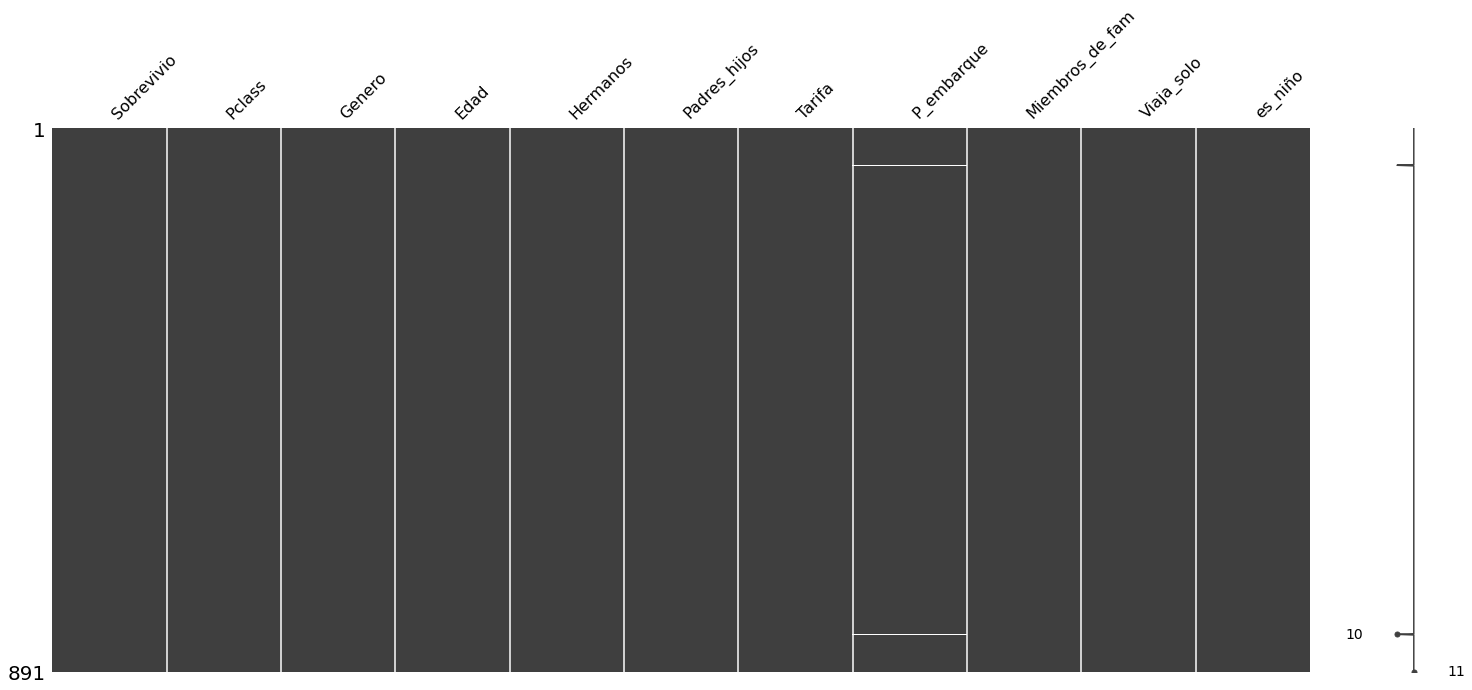

In [4]:
#Verifiquemos que nadie no ha reemplazado sus features.
import missingno as ms
ms.matrix(train)

In [0]:
train['P_embarque'].fillna(train['P_embarque'].mode()[0],inplace=True)

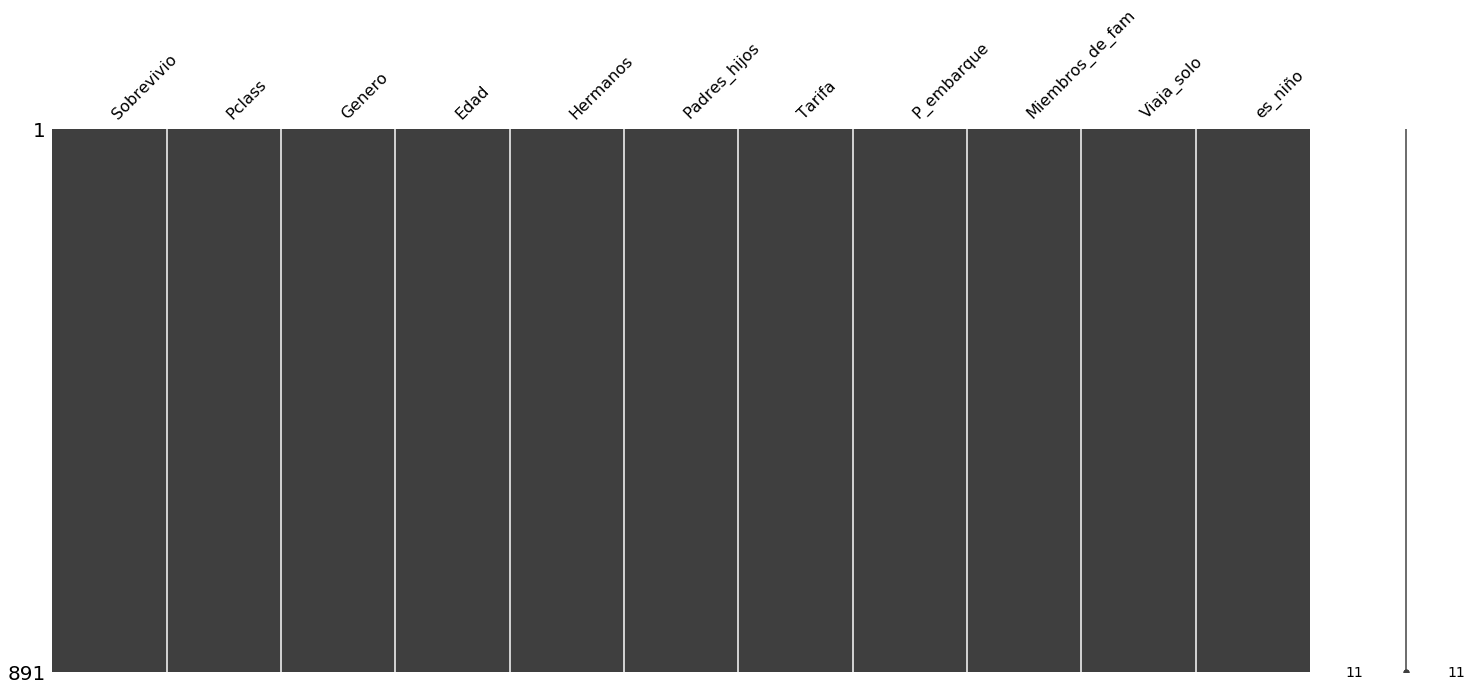

Tenemos que importar los id para poder summitear al final. Porque recuerda que los eliminamos en la anterior sesion

In [0]:
summit_id = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/test.csv')

In [7]:
train.head(2)

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo,es_niño
0,0,3,0,0.022824,1,0,0.006032,2.0,2,0,0
1,1,1,2,0.039423,1,0,0.059304,1.0,2,0,0


## Recordando el problema y los métodos aprendidos

In [8]:
#mask: Filtren a las personas de la clase 3
mask = (train['Pclass'] == 3)
train[mask]

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo,es_niño
0,0,3,0,0.022824,1,0,0.006032,2.0,2,0,0
2,1,3,2,0.026974,0,0,0.006593,2.0,1,1,0
4,0,3,0,0.036311,0,0,0.006697,2.0,1,1,0
5,0,3,0,0.030086,0,0,0.007037,0.0,1,1,0
7,0,3,1,0.002075,3,1,0.017533,2.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,2,0.022824,0,0,0.008749,2.0,1,1,0
884,0,3,0,0.025937,0,0,0.005865,2.0,1,1,0
885,0,3,2,0.040461,0,5,0.024230,0.0,6,0,0
888,0,3,2,0.030086,1,2,0.019509,2.0,4,0,0


# Machine Learning

- Hoy haremos nuestros primeros modelos de machine learning.Nos centraremos específicamente en tres modelos: Regresión Logística, Árboles de Decisión y RandomForest. A lo largo de la clase iteraremos entre código y teoría. Así que, empecemos!

Recuerda que tenemos dos conjuntos de datos: **train** y **summit**. Esto es porque el **objetivo** es hacer un modelo de aprendizaje automático (machine learning) para poder postearlo en la competencia de Kaggle. Específicamente haremos un **modelo suppervisado** que nos prediga si el pasajero **sobrevive** o **no sobrevive**. Se va a dividir la data porque cierto grupo de datos (train) nos servirá para **entrenar** el modelo y el otro grupo de datos para **testearlo** (crearemos otro grupo test). Luego de hacer el respectivo testeo del modelo podremos mandarlo a producción, es decir, que interactúe con data real.    

In [0]:
#Tendremos que hacer nuestras variables predictoras X y nuestra variable objetivo Y
X = train.drop('Sobrevivio', axis=1)
y = train['Sobrevivio']

### Dividiremos nuestra data para poder entrenar y evaluar nuestros modelos.

In [0]:
#Dense cuenta de que se importa desde model_selection, porque efectivamente sirve para poder seleccionar nuestros modelos
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score #Vamos a medir el accuracy de nuestro modelo... 

In [0]:
#Dividing the data before tuning the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [12]:
#Explorar los nuevos datos partidos
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (668, 10) y para el y_train (668,)
Para el X_test: (223, 10) y para el y_test (223,)


- Los pasos para entrenar un modelo son simples: Fitear y predecir. Nada más. Luego haremos algunas métricas para poder ver qué tan bien nos ha servido nuestro clasificador. 

### Regresión Logística con Python. 

La famosa Regresión Logística es el modelo más básico (y no le quita que aún así sea poderoso y el mejor en algunos casos) de los modelos disponibles dentro de la librería scikit learn. Veamos como podemos ponerlo a prueba. Pero antes, recordemos y **veamos un poco de teoría**.

In [14]:
from sklearn.linear_model import LogisticRegression
#Simple Logistic Regression:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Una vez hecho el fiteo de los datos. Tenemos nuestro modelo **almacenado** y **entrenado** en la variable **LogReg** 

In [15]:
#show
logreg_pred = logreg.predict(X_test)
logreg_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

- Recuerda que la función **accuracy_score** nos va a decir el porcentaje de predicción de nuestro modelo, es decir, cuánto del total de registros nos está prediciendo bien. Esta función nos va a aceptar como primer parámetro las verdaderas predicciones y como segundo parámetro las predicciones hechas por nuestro modelo.

In [17]:
#accuracy_score
accuracy_score(y_test, logreg_pred )

0.8161434977578476

In [18]:
print('El accuracy para mi primero modelo es :{0:.8f}'.format(accuracy_score(y_test,logreg_pred)))

El accuracy para mi primero modelo es :0.81614350


#### Intentaremos hacer un poquito mejor nuestro modelo:  Recuerda que hemos sacado un 83.208% en este caso. A lo mejor tu modelo bota un resultado diferente, y eso es normal si es que tu data estaba transformada de manera diferente.


- Lo chévere de nuestro modelo de Regresión Logística es que nos permite ver las probabilidades que ha generado con cada fila de datos. Es decir, nos dice qué tan probable es (según nuestro modelo) que el pasajero N haya sobrevivido a la catástrofe del Titanic. 

In [19]:
#Quiero saber qué coeficientes de la ecuación logística mi modelo me está botando... 

#Esto también es una forma de decir qué tanto mi modelo valora cada variable predictora
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(logreg.coef_[0],4) })
df_weights

,feature,beta
0,Pclass,-0.8912
1,Genero,1.5480
2,Edad,-0.1908
3,Hermanos,-0.2469
4,Padres_hijos,-0.0699
5,Tarifa,0.0762
6,P_embarque,-0.2031
7,Miembros_de_fam,-0.3171
8,Viaja_solo,-0.6678
9,es_niño,1.6744


In [0]:
#Predict proba
proba_pred_test = logreg.predict_proba(X_test)[:,1]

### Puntos de corte

- Con el siguiente gráfico podemos evaluar si efectivamente nuestro punto de corte por default sería el mejor. Lamentablemente, scikitlearn no tiene un parámetro que nos ayude a optimizar nuestro punto de corte, sino tendremos que hacerlo a mano. Pero descuida. Esto no es tan difícil. Veremos:

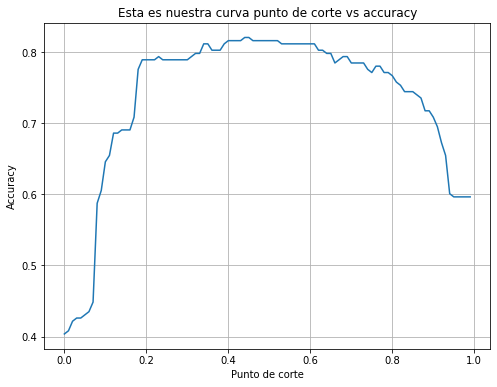

In [23]:
lista_de_accuracy = [] #Esta será la lista donde meteré todas mis variables
for punto_de_corte in range(0,100):  #Itero por sobre todos los puntos de corte posibles (nota que estoy iterando solamente por sobre enteros)
    pred_0_1 = [1 if x >= punto_de_corte/100 else 0 for x in proba_pred_test] #Para cada x en la variable donde están mis probabilidades, dame 1 si este x es > punto_de_corte 
    lista_de_accuracy.append(accuracy_score(y_test, pred_0_1)) #Agrega el accuracy_score resultante para cada punto de corte por el que hemos iterado

xs = [x/100 for x in range(0,100)] #Una lista de en qué porcentaje de la iteración vamos
ys = lista_de_accuracy # La lista de los accuracys

plt.figure(figsize=(8,6)) #Es para modificar el tamaño del gráfico
plt.grid(True) #Para que nuestro gráfico tenga esa rayitas y nos ubiquemos mejor
plt.title('Esta es nuestra curva punto de corte vs accuracy') #El título del gráfico
plt.xlabel('Punto de corte') #El título del eje X
plt.ylabel('Accuracy') #El título del eje Y
plt.plot(xs, ys) #Ploteamos nuestro gráfico con las variables que antes hemos creado

-  Cuál es entonces el punto de corte óptimo para maximizar nuestro accuracy? Ahora tendremos que **probar el modelo con ese punto de corte** 

Para esto haremos una lista donde podamos redondear las probabilidades que tenemos que son mayores a nuestro nuevo punto de corte

In [0]:
#List comprehensions, redondeando probabilidades. 
predicciones_nuevo_pc = [1 if prob >= 0.21 else 0 for prob in proba_pred_test]

In [29]:
print('El accuracy para mi primer modelo es :{0:.8f}'.format(accuracy_score(y_test,logreg_pred)))
accuracy_score(y_test,predicciones_nuevo_pc)

El accuracy para mi primer modelo es :0.81614350


0.7892376681614349

### Clasificador de Árbol de Decisión (Decision Tree Classifier) 

Los árboles de decisión **son los modelos más básicos de toda una gama de modelos.** A pesar de que sean algo básicos, del concepto de cómo están organizados va a partir todos los demás subsiguientes modelos que vamos a ver. Un ejemplo de esto son los siguientes Random Forest que veremos en esta clase o los AdaBoost, CatBoost, XGBoost y etc que veremos en siguientes clases

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #Para poder medir mi accuracy

In [31]:
#Entreno mi árbol
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
#Mido sus resultados
tree_y_predict = tree_clf.predict(X_test)
print(accuracy_score(y_test, tree_y_predict))

0.7892376681614349


## Pequeña optimizacion

**¿Qué es una optimización de hiperparámetros?** Los hiperparámetros en ml son variables que están dentro del modelo y que pueden tomar diferentes valores. Estos diferentes valores son usualmente se toman en cuenta para poder darle mejor forma al modelo según los datos que tengas y **es necesario conocer la teoría que hay detrás de un modelo** para que puedas optimizarlos con mayor facilidad. Vamos a ver en la teoría cómo funcionan los árboles de decisión y qué significan sus hiperparámetros.

- Aún podemos mejorar nuestro árbol testeando **solo uno** de sus hiperparámetros:

In [36]:
for i in range(1,18): #para cada  numero i del 1 al 18
    tree_clf = DecisionTreeClassifier(max_depth=i) #Crea un arbol, donde tenga el max_depth = i
    tree_clf.fit(X_train,y_train) #Entrena ese arbol
    y_pred = tree_clf.predict(X_test) #Predice con el arbol entrenado. 
    
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i) #Dime cuanto ha sacado.

Mi árbol da un accuracy de: 0.7623318385650224 cuando su max_depth es:  1
Mi árbol da un accuracy de: 0.7937219730941704 cuando su max_depth es:  2
Mi árbol da un accuracy de: 0.8161434977578476 cuando su max_depth es:  3
Mi árbol da un accuracy de: 0.8161434977578476 cuando su max_depth es:  4
Mi árbol da un accuracy de: 0.8161434977578476 cuando su max_depth es:  5
Mi árbol da un accuracy de: 0.7802690582959642 cuando su max_depth es:  6
Mi árbol da un accuracy de: 0.7892376681614349 cuando su max_depth es:  7
Mi árbol da un accuracy de: 0.8116591928251121 cuando su max_depth es:  8
Mi árbol da un accuracy de: 0.8071748878923767 cuando su max_depth es:  9
Mi árbol da un accuracy de: 0.8116591928251121 cuando su max_depth es:  10
Mi árbol da un accuracy de: 0.8026905829596412 cuando su max_depth es:  11
Mi árbol da un accuracy de: 0.8071748878923767 cuando su max_depth es:  12
Mi árbol da un accuracy de: 0.8071748878923767 cuando su max_depth es:  13
Mi árbol da un accuracy de: 0.7982

###### Entonces vamos a elegir el resultado que haga a nuestro modelo algo mejor :) 

In [37]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_tree = tree_clf.predict(X_test)

## Matriz de confusión:

Cuenta el número de veces en que las predicciones hechas caen en **error tipo 1** y **error tipo 2**. Así como también cuenta las buenas predicciones que ha hecho nuestro modelo. 

- **Error tipo1**: De manera errónea se predijo 1 cuando en realidad es 0. Es decir, nuestro algoritmo nos dijo que una personas sobrevivió cuando en realidad estaba muerta.

- **Error tipo2**: De manera errónea se predijo 0 cuando en realidad es 1. Nuestro modelo nos dice que una persona ha muerto cuando en realidad ha sobrevivido.

- **True Positive(Verdadero Positivo)**: Nos dice que es 1 cuando efectivamente es 1. Predice de manera correcta la supervivencia.

- **False Negative (Falso Negativo)**: Nos dice que es 0 cuando de verdad es 0. Cuántos casos predice de manera correcta la no-supervivencia. 


[]

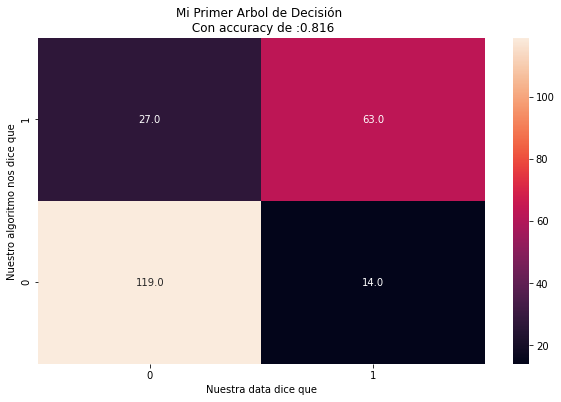

In [40]:
#Plotearemos una matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred_tree) #Creo la matriz de confusón así de fácil

plt.figure(figsize=(10,6))

plt.title('Mi Primer Arbol de Decisión \n Con accuracy de :{0:.3f}'.format(accuracy_score(y_test, y_pred_tree)))
ax=sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

In [0]:
#Confirmemos efectivamente lo que nuestra data nos dice:
y_test[y_test == 1].sum()

107

## Una evolución de los Árboles de Decisión: Bosques Aleatorios (Random Forest)

- Un RandomForest es un agregado de árboles de decisiones, donde cada uno de estos árboles se entrena con diferentes partes de la data escogida de manera aleatoria. Luego de tener una cierta cantidad de árboles (500 en el ejemplo) se hace una votación para hacer cada predicción.  

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
#Random Forest Classifier model. Con sus hiperparámetros. 
rnd_clf  = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
#Prediciendo los valores.
rnd_clf.fit(X_train, y_train)

y_pred_rnd = rnd_clf.predict(X_test)

- También sacaremos matriz de confusión para este caso: 

[]

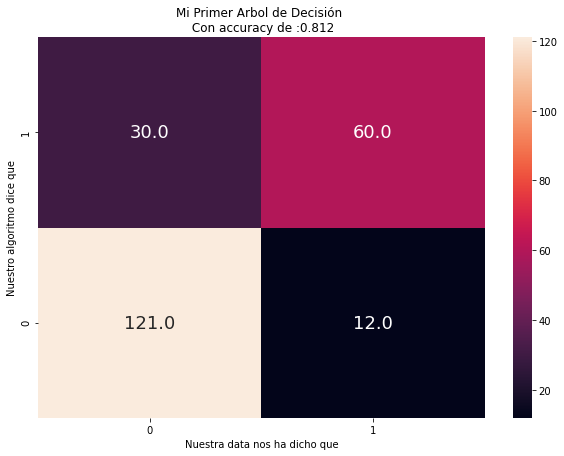

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred_rnd) #Creo la matriz de confusón así de fácil

plt.figure(figsize=(10,7))

plt.title('Mi Primer Arbol de Decisión \n Con accuracy de :{0:.3f}'.format(accuracy_score(y_test, y_pred_rnd)))
ax=sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 18}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data nos ha dicho que')
plt.ylabel('Nuestro algoritmo dice que')
plt.plot()

In [44]:
accuracy_score(y_test, y_pred_rnd)

0.8116591928251121

- Una de las mayores ventajas de entrenar un árbol de decisión y mejor aún un random forest, es que podemos ver cuáles son nuestras variables más importantes. 

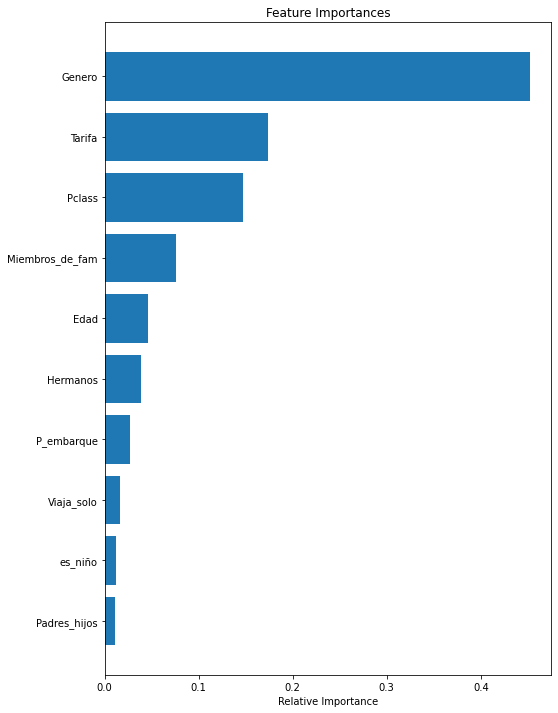

In [45]:
#Saquemos los valores más importantes 
importances = rnd_clf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Acá es cuando yo veo y evalúo si puedo o debo crear más features para mejorar el modelo o no.

In [46]:
X_train_2 = X_train.drop(['Viaja_solo','es_niño'],axis=1)
rnd_clf.fit(X_train_2,y_train)
rnd_clf.score(X_test.drop(['Viaja_solo','es_niño'],axis=1),y_test)

0.8071748878923767

### Tarea: Agregando rápidamente otro modelo: SupportVectorClassifier

### Curvas ROC (Receiver Operator Characteristic) ¿Qué modelo tiene un mejor performance?

- Nos resume de manera fácil cómo se está comportando nuestro algoritmo al clasificar nuestras categorías.

- En el eje X se grafica la sensitividad (ratio de **True Positives**) y en el eje Y se grafica (**1 - especificidad**) .

- Recuerda que el punto en la esquina superior derecha nos dirá que todos los casos negativos han sido bien clasificados, pero también que todos los casos negativos han sido mal clasificados. (más sensitividad y alta especificidad)

- **EN RESUMEN!** La curva ROC resume todas las matrices de confusión dados los diferentes puntos de corte de tu algoritmo de clasificación. 

In [0]:
#### AUC (Area under the  Curve) Es la area bajo la curva ROC, te resume el gráfico de la ROC en un solo número.

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

clasificadores = [logreg, tree_clf, rnd_clf] #Hacemos una lista de clasificadores

tabla_resultados = pd.DataFrame(columns=['clasificadores', 'fpr','tpr','auc']) #Haremos un dataframe (tabla) para almacenar mis métricas

for cls in clasificadores: #Para cada clasificador
    model = cls.fit(X_train, y_train) #Entrenalo
    yproba = model.predict_proba(X_test)[:,1] #Sacale las probabilidades
    
    fpr, tpr, _ = roc_curve(y_test,  yproba) #Danos su curva roc
    auc = roc_auc_score(y_test, yproba) #Y su métrica auc
    
    tabla_resultados = tabla_resultados.append({'clasificadores':None,
                                      'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True) #Así ordenamos nuestra data


In [49]:
#Acá simplemente pondremos nuestros clasificadores como index
tabla_resultados['clasificadores'] = ['RegresionLogistica','ArbolDecision','RandomForest']
tabla_resultados.set_index('clasificadores', inplace=True)
tabla_resultados

,fpr,tpr,auc
clasificadores,,,
RegresionLogistica,"[0.0, 0.0, 0.0, 0.015037593984962405, 0.015037...","[0.0, 0.011111111111111112, 0.3777777777777777...",0.864703
ArbolDecision,"[0.0, 0.015037593984962405, 0.0150375939849624...","[0.0, 0.43333333333333335, 0.5111111111111111,...",0.882122
RandomForest,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007518796992481203...","[0.0, 0.011111111111111112, 0.0666666666666666...",0.884336


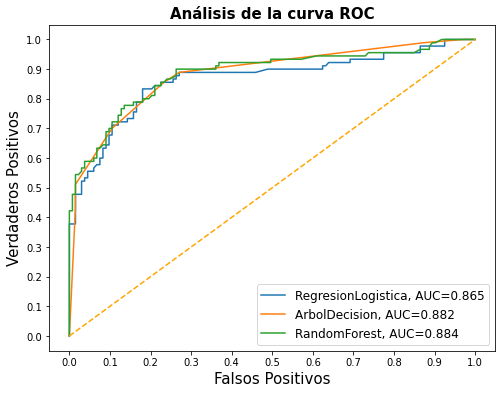

In [50]:
fig = plt.figure(figsize=(8,6))

for i in tabla_resultados.index:
    plt.plot(tabla_resultados.loc[i]['fpr'], 
             tabla_resultados.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, tabla_resultados.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Falsos Positivos", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Verdaderos Positivos", fontsize=15)

plt.title('Análisis de la curva ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

## Haciendo submit a mis predicciones

In [0]:
def csv_a_submitir(model = logreg, name = 'csv_a_submitir.csv'):
    pred = model.predict(summit)
    submissions =  pd.DataFrame({'PassengerId':summit_id['IdPasajero'],'Survived': pred})
    submissions = submissions.set_index('PassengerId')
    submissions.to_csv(name)
    print('Se ha generado un csv con el nombre: ', name)
    return submissions

In [0]:
#Falta hacer función que nos permita hacer un csv con la forma que nos pide la competencia de kaggle.
preds = logreg.predict(summit)

In [0]:
sub = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/gender_submission.csv')

In [0]:
#Editamos la plantilla de submission y summiteamos. 
sub['Survived'] = preds

     |████████████████████████████████| 911kB 2.7MB/s 


In [67]:
!ls

sample_data  submissioni1.csv  Titanic01.db


In [0]:
sub.to_csv('submissioni1.csv',index=False)